In [1]:
using CairoMakie
using Turing
using CSV, DataFrames

In [47]:
using PairPlots

In [2]:
subgiants = CSV.read("../data/subgiants.csv", DataFrame)

14069×366 DataFrame
   Row │ APOGEE_ID              FILE                               TARGET_ID   ⋯
       │ String31               String                             String      ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ b'2M00002185+1459100'  b'apStar-dr17-2M00002185+1459100…  b'apo25m.10 ⋯
     2 │ b'2M00004159+6505249'  b'apStar-dr17-2M00004159+6505249…  b'apo25m.11
     3 │ b'2M00004251+5643075'  b'apStar-dr17-2M00004251+5643075…  b'apo25m.NG
     4 │ b'2M00005728+6958488'  b'apStar-dr17-2M00005728+6958488…  b'apo25m.12
     5 │ b'2M00012854+7021553'  b'apStar-dr17-2M00012854+7021553…  b'apo25m.12 ⋯
     6 │ b'2M00012956+5707016'  b'apStar-dr17-2M00012956+5707016…  b'apo25m.NG
     7 │ b'2M00014161+0143570'  b'apStar-dr17-2M00014161+0143570…  b'apo25m.10
     8 │ b'2M00023757+0155331'  b'apStar-dr17-2M00023757+0155331…  b'apo25m.10
     9 │ b'2M00024092+0200009'  b'apStar-dr17-2M00024092+0200009…  b'apo25m.10 ⋯
    10 │ b'2M00025477+1409286'  b'apStar-dr17-2M00025477+1409286…  b'apo25m.10
    11 │ b'2M00025481+6146052'  b'apStar-dr17-2M00025481+6146052…  b'apo25m.11
   ⋮   │           ⋮                            ⋮                              ⋱
 14060 │ b'2M23570504+5805421'  b'apStar-dr17-2M23570504+5805421…  b'apo25m.11
 14061 │ b'2M23570872+1648474'  b'apStar-dr17-2M23570872+1648474…  b'apo25m.10 ⋯
 14062 │ b'2M23580576+5558469'  b'apStar-dr17-2M23580576+5558469…  b'apo25m.N7
 14063 │ b'2M23581150+1537203'  b'apStar-dr17-2M23581150+1537203…  b'apo25m.10
 14064 │ b'2M23581837-7222318'  b'asStar-dr17-2M23581837-7222318…  b'lco25m.SM
 14065 │ b'2M23582628+5524124'  b'apStar-dr17-2M23582628+5524124…  b'apo25m.N7 ⋯
 14066 │ b'2M23582727+5606296'  b'apStar-dr17-2M23582727+5606296…  b'apo25m.N7
 14067 │ b'2M23590547+1514580'  b'apStar-dr17-2M23590547+1514580…  b'apo25m.10
 14068 │ b'2M23594577-7351233'  b'asStar-dr17-2M23594577-7351233…  b'lco25m.SM
 14069 │ b'2M23594945+1445256'  b'apStar-dr17-2M23594945+1445256…  b'apo25m.10 ⋯
                                              364 columns and 14048 rows omitted

In [6]:
using FillArrays

In [57]:
FillArrays.I

LinearAlgebra.UniformScaling{Bool}
true*I

In [90]:
idx = subgiants.MG_H .> -1
idx .&= .!subgiants.high_alpha

x = subgiants.MG_H[idx]
y = subgiants.C_MG[idx];
x_e = subgiants.MG_H_ERR[idx];
y_e = subgiants.C_MG_ERR[idx];

In [93]:
sum(idx), sum(.! idx)

(10023, 4046)

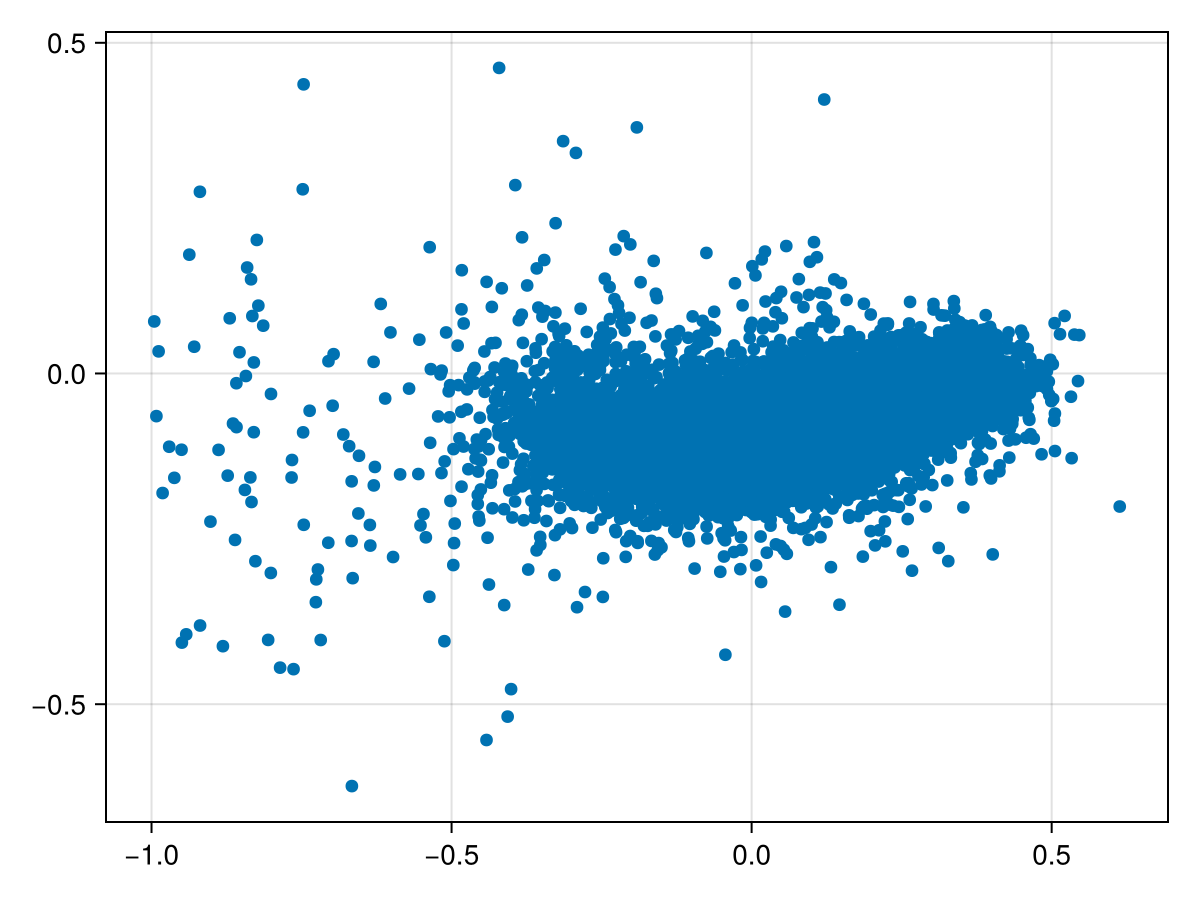

In [94]:
scatter(x, y)

# Linear Model

In [56]:
@model function linear_regression(x, y, x_e, y_e)
    log_σ ~ Normal(-2, 0.8)
    a ~ Normal(0, 0.4)
    b ~ Normal(0, 0.5)

    mu = a .+ x*b

    s_int = exp(2log_σ)
    s_x = b .* x_e
    s_y = y_e

    σ = @. sqrt(s_int^2 + s_x^2 + s_y^2)
    return y ~ MvNormal(mu, σ)

end

linear_regression (generic function with 2 methods)

In [48]:
function plot_samples!(samples, x;
        thin=10, color=:black, alpha=nothing, kwargs...)

    alpha = 1/size(samples, 1)^(1/3)

    for sample in eachrow(samples)[1:thin:end]
        y = @. sample.a + sample.b * x
        lines!(x, y, color=color, alpha=alpha)
    end
end

plot_samples! (generic function with 1 method)

In [95]:
model = linear_regression(x, y, x_e, y_e)

DynamicPPL.Model{typeof(linear_regression), (:x, :y, :x_e, :y_e), (), (), NTuple{4, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(linear_regression, (x = [-0.17626399, 0.533275, 0.301142, 0.099637, 0.16882, 0.362491, -0.09526001, 0.14914101, -0.180394, 0.07332101  …  -0.109707, -0.16563499, 0.24449101, 0.31743252, 0.03412, 0.1356989, -0.235826, 0.067715004, -0.480111, 0.193917], y = [-0.181092, -0.12805, 0.030329019, -0.138952, 0.015834004, -0.05288902, -0.144582, -0.067502014, -0.066625, -0.084882006  …  -0.124513, 0.0055869967, -0.089804, -0.0003478229, -0.078660995, 0.014289096, -0.066061005, -0.022974003, -0.11042899, -0.09682111], x_e = [0.035809286, 0.01998824, 0.020215891, 0.026908288, 0.024133783, 0.022604257, 0.030811775, 0.016573794, 0.025822686, 0.026286472  …  0.02420853, 0.02659984, 0.01616313, 0.014025148, 0.02183387, 0.02885824, 0.019656576, 0.025945775, 0.03141886, 0.018385962], y_e = [0.05699908, 0.02348673, 0.027562, 0.03970784, 0.033569593, 0.029439528, 0.059

In [96]:
chain = sample(model, NUTS(), 5_000)

┌ Info: Found initial step size
└   ϵ = 0.000390625
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:43


Chains MCMC chain (5000×15×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 44.73 seconds
Compute duration  = 44.73 seconds
parameters        = log_σ, a, b
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

       log_σ   -1.6057    0.0064    0.0001   2014.2449   2056.6990    0.9999   ⋯
           a   -0.0822    0.0006    0.0000   4579.6721   3455.3180    1.0000   ⋯
           b    0.1309    0.0028    0.0001   2527.4591   2649.6605    1.0001   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75

In [97]:
samples = DataFrame(chain)

5000×17 DataFrame
  Row │ iteration  chain  log_σ     a           b         lp       n_steps  is ⋯
      │ Int64      Int64  Float64   Float64     Float64   Float64  Float64  Fl ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │      1001      1  -1.60426  -0.0821209  0.127478  14561.3      7.0     ⋯
    2 │      1002      1  -1.60482  -0.0815587  0.128267  14561.3      7.0
    3 │      1003      1  -1.60785  -0.0817448  0.131356  14561.7     11.0
    4 │      1004      1  -1.60135  -0.0822694  0.129238  14561.6     15.0
    5 │      1005      1  -1.60705  -0.0824098  0.130416  14561.9     15.0     ⋯
    6 │      1006      1  -1.6001   -0.0813198  0.127208  14560.3      7.0
    7 │      1007      1  -1.60576  -0.0817809  0.128782  14561.7     15.0
    8 │      1008      1  -1.60439  -0.0833245  0.129479  14559.3      3.0
    9 │      1009      1  -1.61199  -0.0829823  0.133475  14560.6     15.0     ⋯
   10 │      1010      1  -1.61428  -0.0827643  0.131245  14560.6      7.0
   11 │      1011      1  -1.61691  -0.0822236  0.131544  14560.6      5.0
  ⋮   │     ⋮        ⋮       ⋮          ⋮          ⋮         ⋮        ⋮        ⋱
 4991 │      5991      1  -1.60647  -0.0812474  0.127782  14560.6      7.0
 4992 │      5992      1  -1.60919  -0.0815     0.132656  14560.7     11.0     ⋯
 4993 │      5993      1  -1.61983  -0.083066   0.131781  14558.5     15.0
 4994 │      5994      1  -1.61983  -0.083066   0.131781  14558.5      3.0
 4995 │      5995      1  -1.61585  -0.0821742  0.129403  14560.6      7.0
 4996 │      5996      1  -1.61264  -0.0824867  0.130802  14561.3      7.0     ⋯
 4997 │      5997      1  -1.6094   -0.0820874  0.130543  14561.9      7.0
 4998 │      5998      1  -1.60742  -0.0823599  0.131374  14562.0      7.0
 4999 │      5999      1  -1.60255  -0.0812485  0.126315  14560.0     11.0
 5000 │      6000      1  -1.61849  -0.0831657  0.133108  14558.7     15.0     ⋯
                                                10 columns and 4979 rows omitted

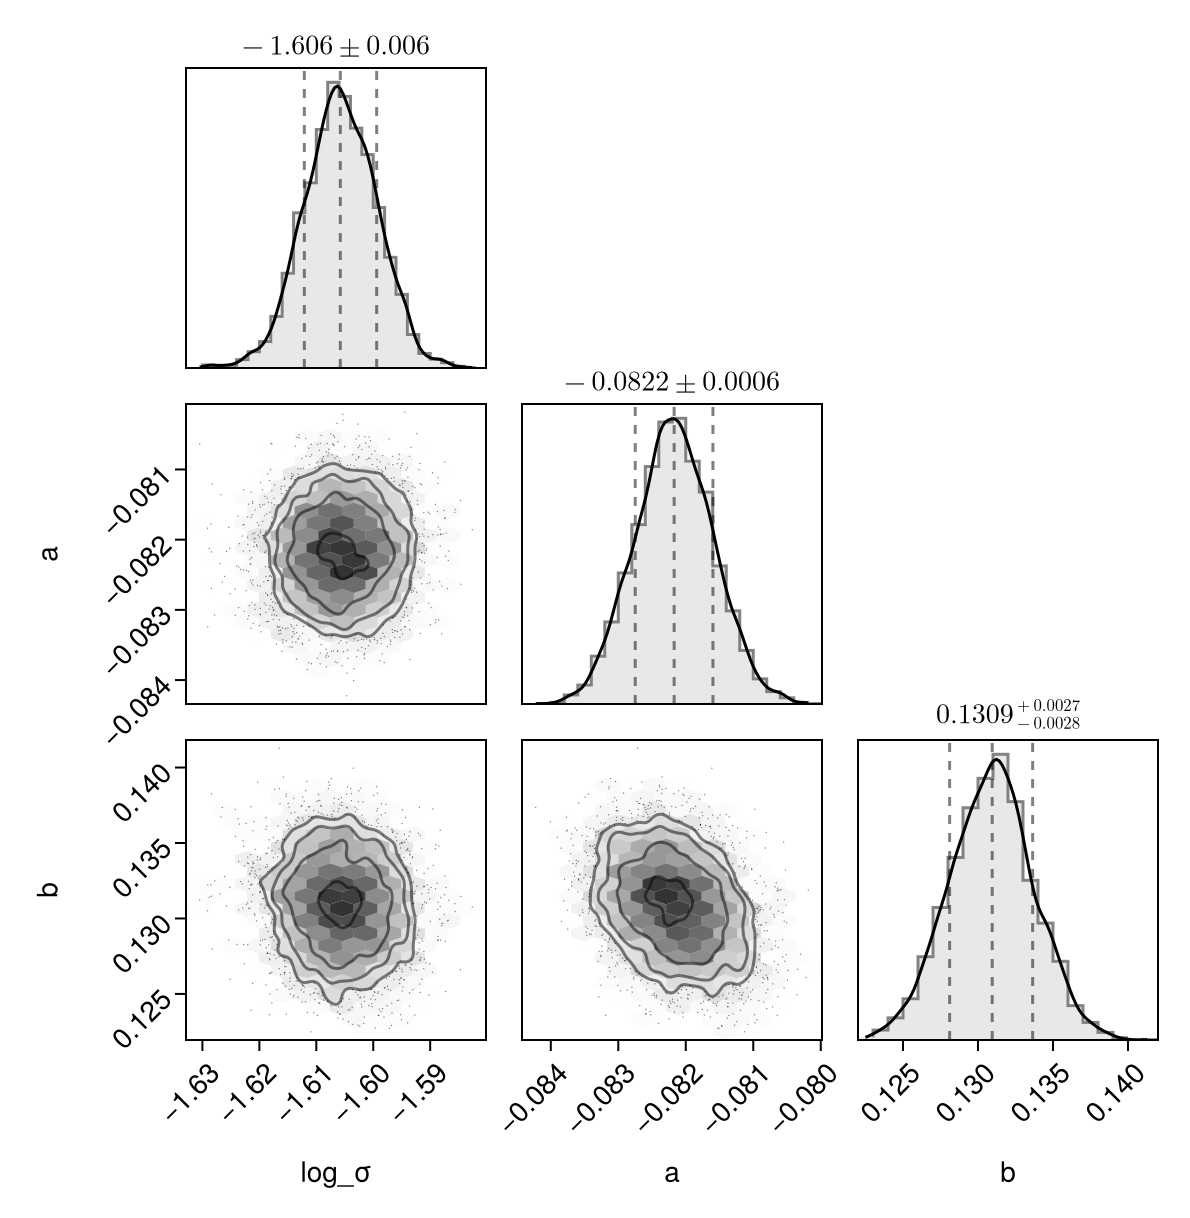

In [98]:
pairplot(chain)

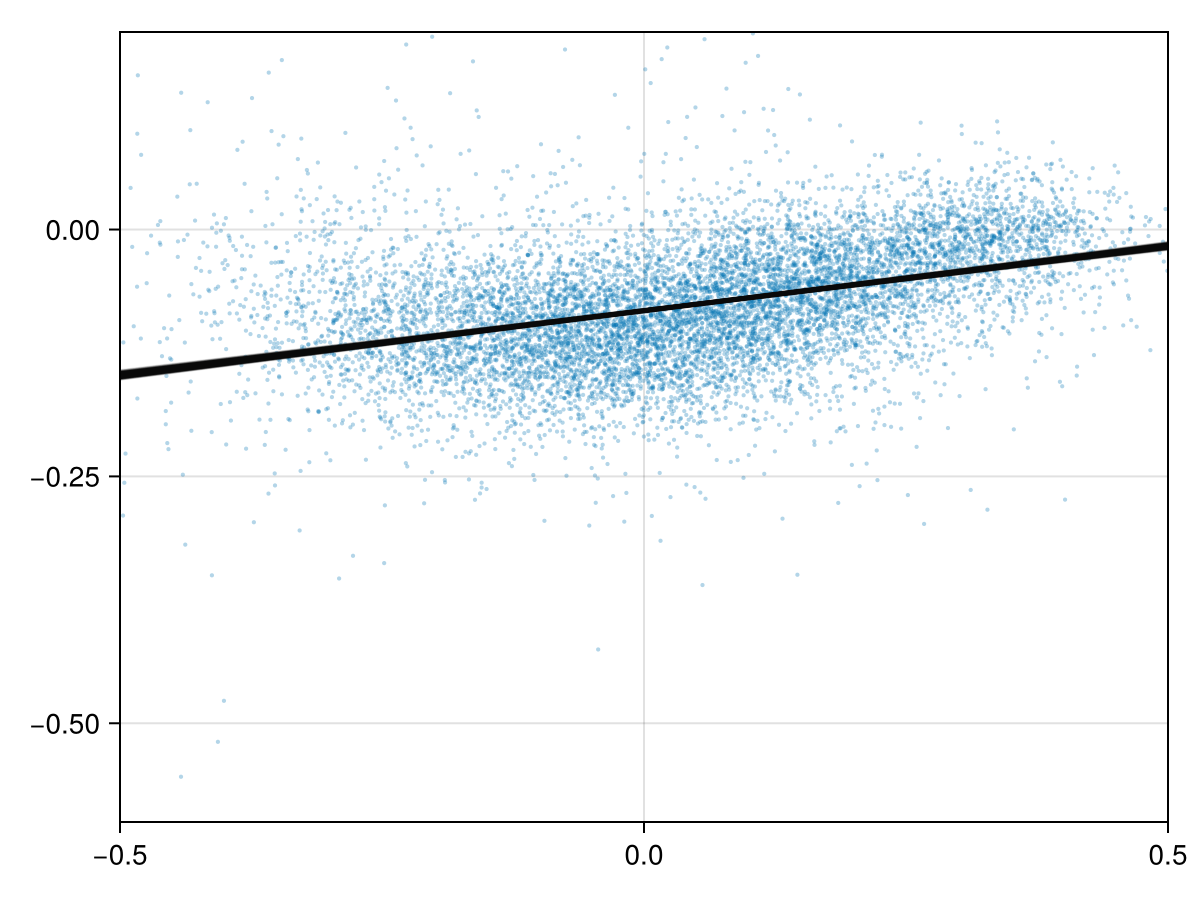

In [99]:
fig = Figure()
ax = Axis(fig[1, 1],
    limits=(-0.5, 0.5, -0.6, 0.2)
)
scatter!(x, y, markersize=3, alpha=0.3)

plot_samples!(samples, LinRange(-0.5, 0.5, 100))

fig

# Log - Lin models

In [194]:

x = 10 .^ subgiants.MG_H[idx]
y = subgiants.C_MG[idx];
x_e = x .* log(10) .* subgiants.MG_H_ERR[idx];
y_e = subgiants.C_MG_ERR[idx];

In [196]:
function plot_data()
    fig = Figure()
    ax = Axis(fig[1, 1], xlabel="[Mg/H]", ylabel="C/Mg")

    scatter!(x, y, markersize=3, alpha=0.3)

    fig
end

plot_data (generic function with 1 method)

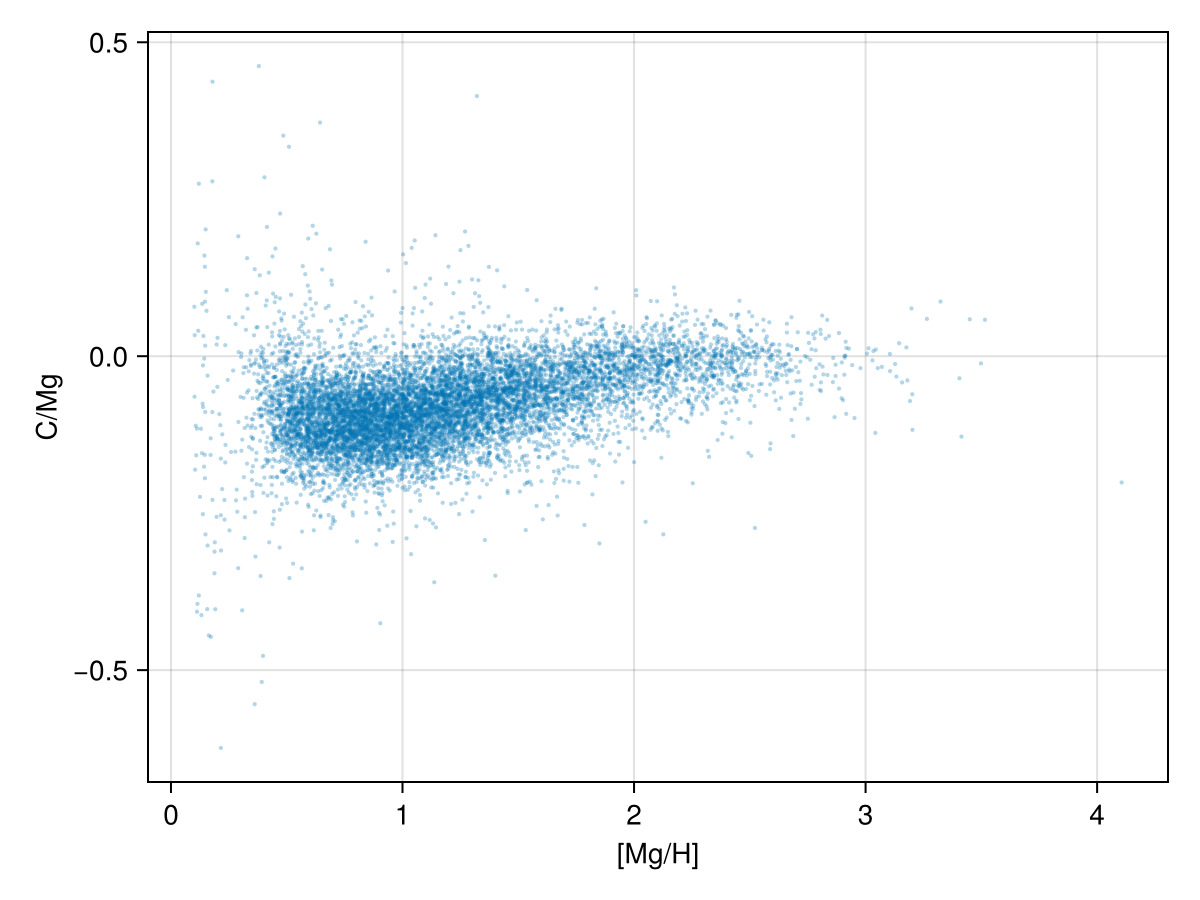

In [197]:
plot_data()

## Linear model

In [198]:
@model function linear_regression(x, y, x_e, y_e)
    log_σ ~ Normal(-2, 0.8)
    a ~ Normal(0, 0.4)
    b ~ Normal(0, 0.5)

    mu = a .+ x*b

    s_int = exp(2log_σ)
    s_x = b .* x_e
    s_y = y_e

    σ = @. sqrt(s_int^2 + s_x^2 + s_y^2)
    return y ~ MvNormal(mu, σ)

end

linear_regression (generic function with 2 methods)

In [199]:
model = linear_regression(x, y, x_e, y_e)

DynamicPPL.Model{typeof(linear_regression), (:x, :y, :x_e, :y_e), (), (), NTuple{4, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(linear_regression, (x = [0.6664015675904591, 3.414090271088859, 2.000515865546813, 1.2578735932428053, 1.4750950308321973, 2.304045228219337, 0.8030451989709059, 1.4097464512054372, 0.6600943264793012, 1.183916327506944  …  0.7767709942142683, 0.6829124180777336, 1.7558645470054417, 2.0769809824302796, 1.0817328038274774, 1.3667808963927177, 0.5809971472910842, 1.1687321850684802, 0.3310464995053472, 1.5628489309077567], y = [-0.181092, -0.12805, 0.030329019, -0.138952, 0.015834004, -0.05288902, -0.144582, -0.067502014, -0.066625, -0.084882006  …  -0.124513, 0.0055869967, -0.089804, -0.0003478229, -0.078660995, 0.014289096, -0.066061005, -0.022974003, -0.11042899, -0.09682111], x_e = [0.05494742696272882, 0.15713221918253947, 0.09312163144332646, 0.07793611552751076, 0.08197116210749628, 0.1199214649241059, 0.056973433963717415, 0.05379954903436921, 

In [200]:
chain = sample(model, NUTS(), 5_000)

┌ Info: Found initial step size
└   ϵ = 0.0001953125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:54


Chains MCMC chain (5000×15×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 56.94 seconds
Compute duration  = 56.94 seconds
parameters        = log_σ, a, b
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

       log_σ   -1.6264    0.0067    0.0002   1257.2148   1066.7098    1.0019   ⋯
           a   -0.1390    0.0014    0.0000   2872.0313   2562.4231    0.9999   ⋯
           b    0.0512    0.0010    0.0000   2854.2934   2795.8117    0.9999   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75

In [201]:
samples = DataFrame(chain);

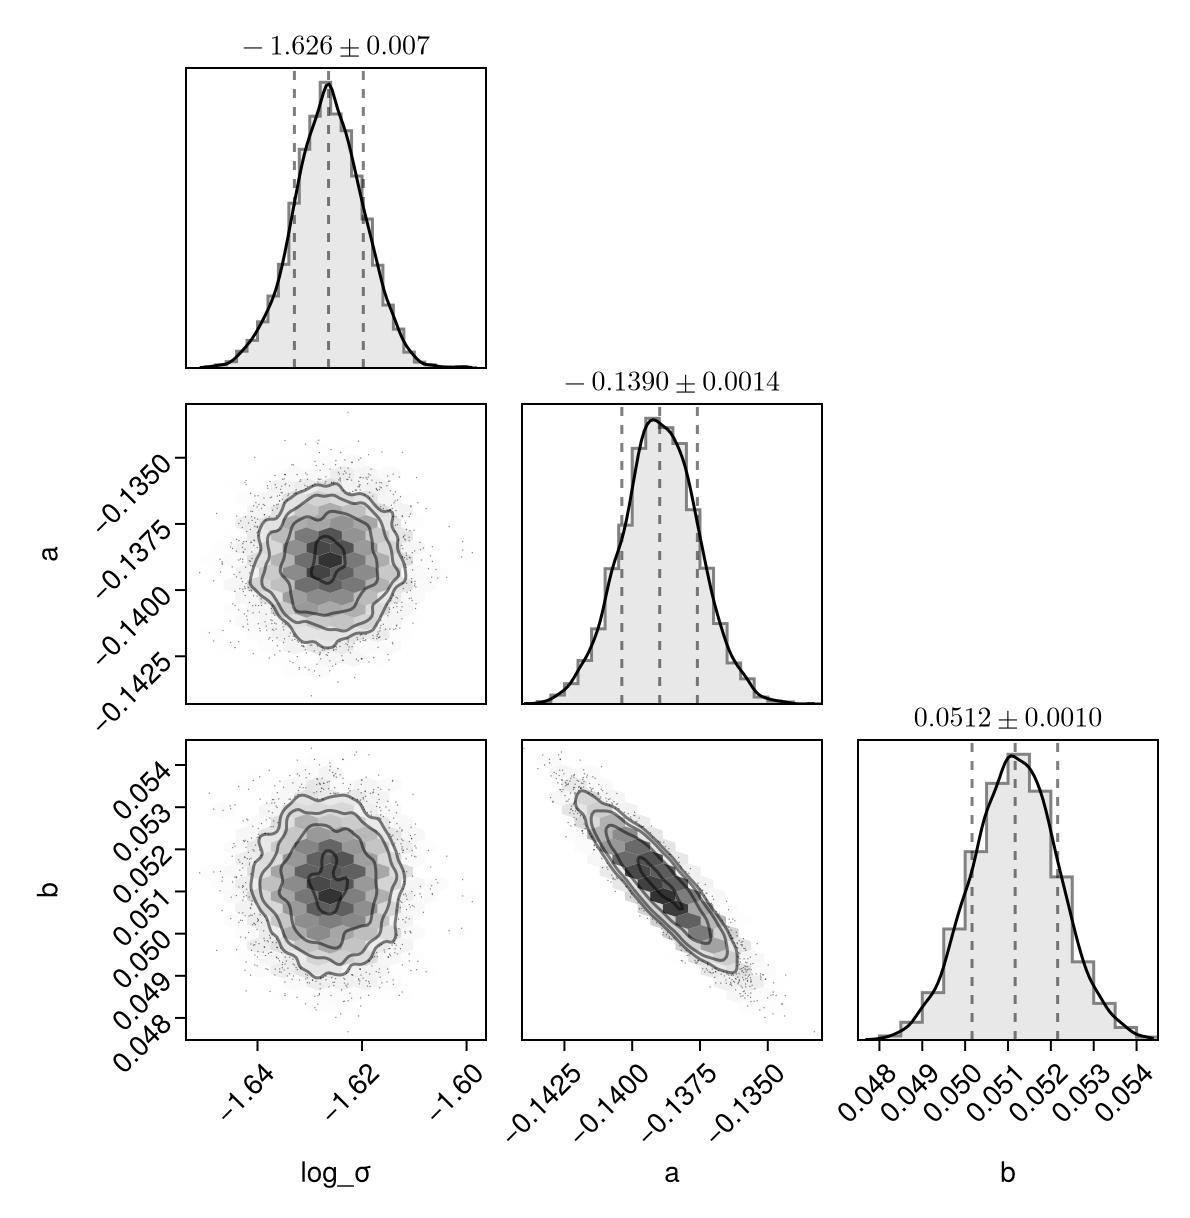

In [202]:
pairplot(chain)

In [203]:
function plot_samples!(samples, x;
        thin=10, color=:black, alpha=nothing, kwargs...)

    alpha = 1/size(samples, 1)^(1/3)

    for sample in eachrow(samples)[1:thin:end]
        y = @. sample.a + sample.b * x
        lines!(x, y, color=color, alpha=alpha)
    end
end

plot_samples! (generic function with 1 method)

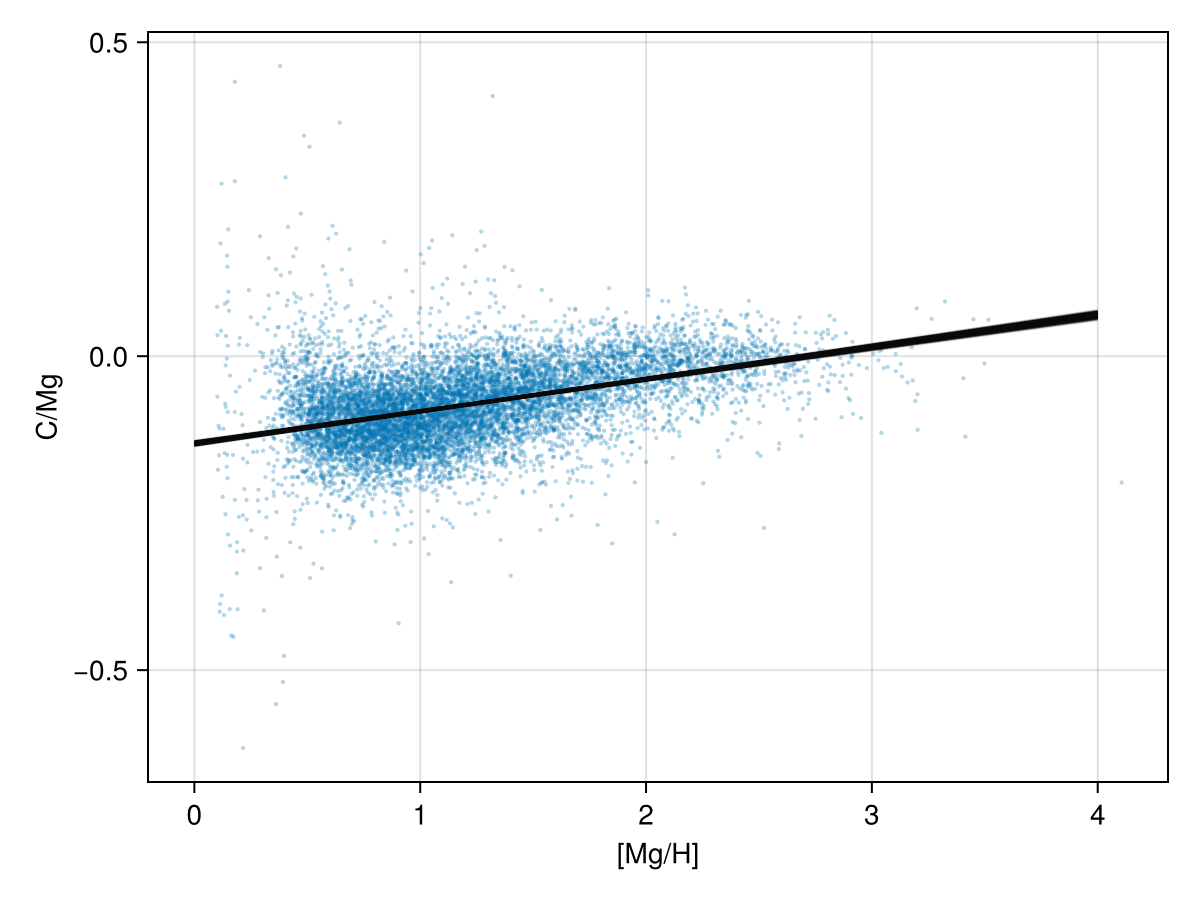

In [204]:
fig = plot_data()

plot_samples!(samples, LinRange(0, 4, 100))

fig

## Exponential

In [205]:
@model function exp_regression(x, y, x_e, y_e)
    log_σ ~ Normal(-2, 0.8)
    a ~ Normal(0, 0.4)
    b ~ Normal(0, 0.5)
    tau ~ Exponential(6)

    mu = @. a + b*exp(x/tau)
    mu_p = @. b/tau * exp(x/tau)
    
    s_int = exp(2log_σ)
    s_x = @. mu_p / mu * x_e
    s_y = y_e

    σ = @. sqrt(s_int^2 + s_x^2 + s_y^2)
    return y ~ MvNormal(mu, σ)

end

exp_regression (generic function with 2 methods)

In [206]:
model = exp_regression(x[1:100], y[1:100], x_e[1:100], y_e[1:100])

DynamicPPL.Model{typeof(exp_regression), (:x, :y, :x_e, :y_e), (), (), NTuple{4, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(exp_regression, (x = [0.6664015675904591, 3.414090271088859, 2.000515865546813, 1.2578735932428053, 1.4750950308321973, 2.304045228219337, 0.8030451989709059, 1.4097464512054372, 0.6600943264793012, 1.183916327506944  …  0.9528268658743423, 1.1584945632202976, 2.500241733200738, 0.7224802840222982, 0.6459263774143195, 0.8433483508241136, 0.49654315570305835, 0.9622856312455071, 1.5726714400298738, 0.8672414062824537], y = [-0.181092, -0.12805, 0.030329019, -0.138952, 0.015834004, -0.05288902, -0.144582, -0.067502014, -0.066625, -0.084882006  …  -0.110465094, -0.0840934, -0.07015398, 0.042207003, -0.25614402, -0.110476, -0.12049103, -0.0239656, -0.034966007, -0.168843], x_e = [0.05494742696272882, 0.15713221918253947, 0.09312163144332646, 0.07793611552751076, 0.08197116210749628, 0.1199214649241059, 0.056973433963717415, 0.05379954903436921, 0.0392485035

In [207]:
chain = sample(model, NUTS(), 5_000)

┌ Info: Found initial step size
└   ϵ = 0.0015625
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:13


Chains MCMC chain (5000×16×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 15.93 seconds
Compute duration  = 15.93 seconds
parameters        = log_σ, a, b, tau
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

       log_σ   -2.0018    0.3677    0.0309   271.8884   134.7582    1.0015     ⋯
           a   -0.3585    0.1406    0.0082   290.0826   343.1509    1.0010     ⋯
           b    0.2487    0.1369    0.0080   284.2433   298.7159    1.0011     ⋯
         tau   11.3862    5.1845    0.2629   324.5446   207.6803    1.0023     ⋯
                                                       

In [208]:
samples = DataFrame(chain);

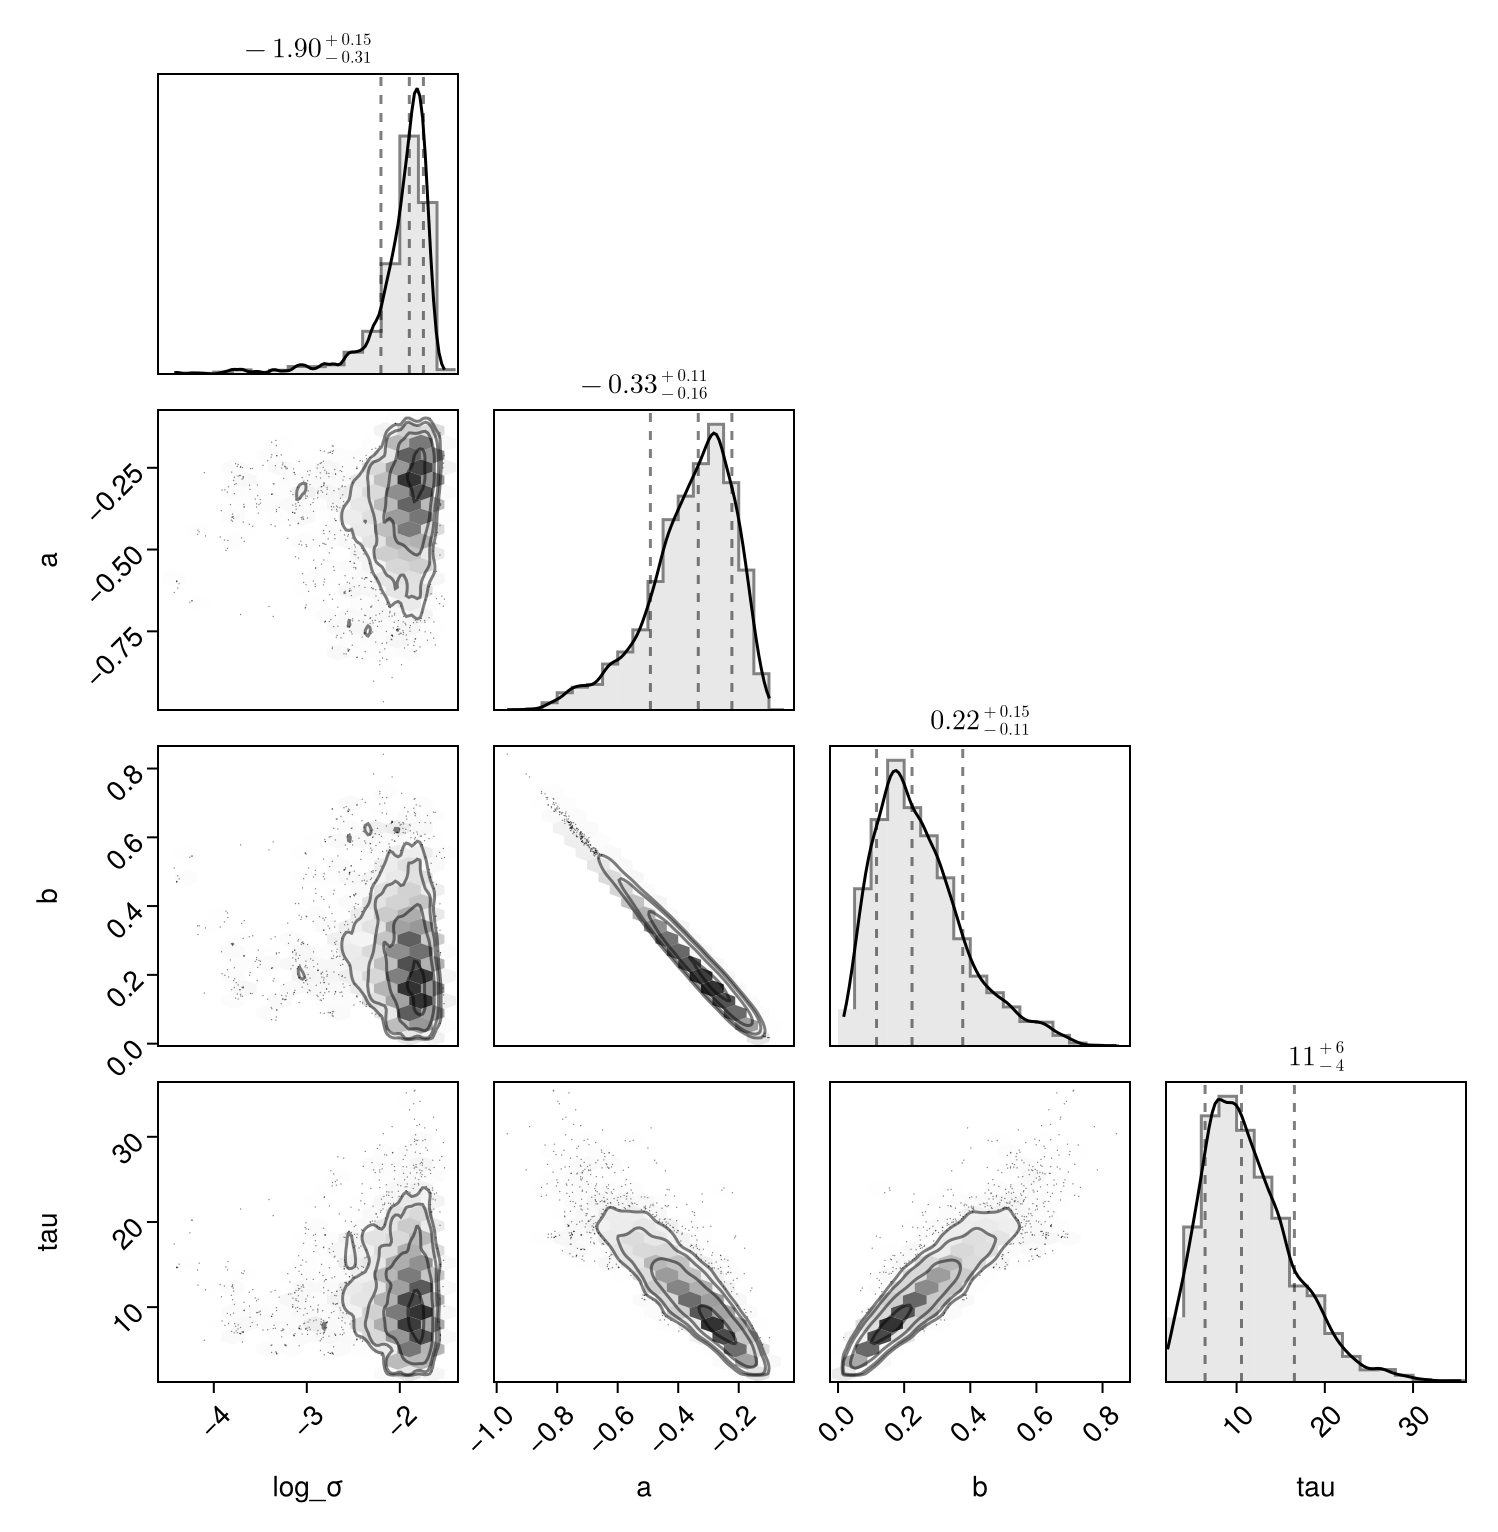

In [209]:
pairplot(chain)

In [210]:
function plot_samples!(samples, x;
        thin=10, color=:black, alpha=nothing, kwargs...)

    alpha = 1/size(samples, 1)^(1/3)

    for sample in eachrow(samples)[1:thin:end]
        y = @. sample.a + sample.b * exp(x / sample.tau)
        lines!(x, y, color=color, alpha=alpha)
    end
end

plot_samples! (generic function with 1 method)

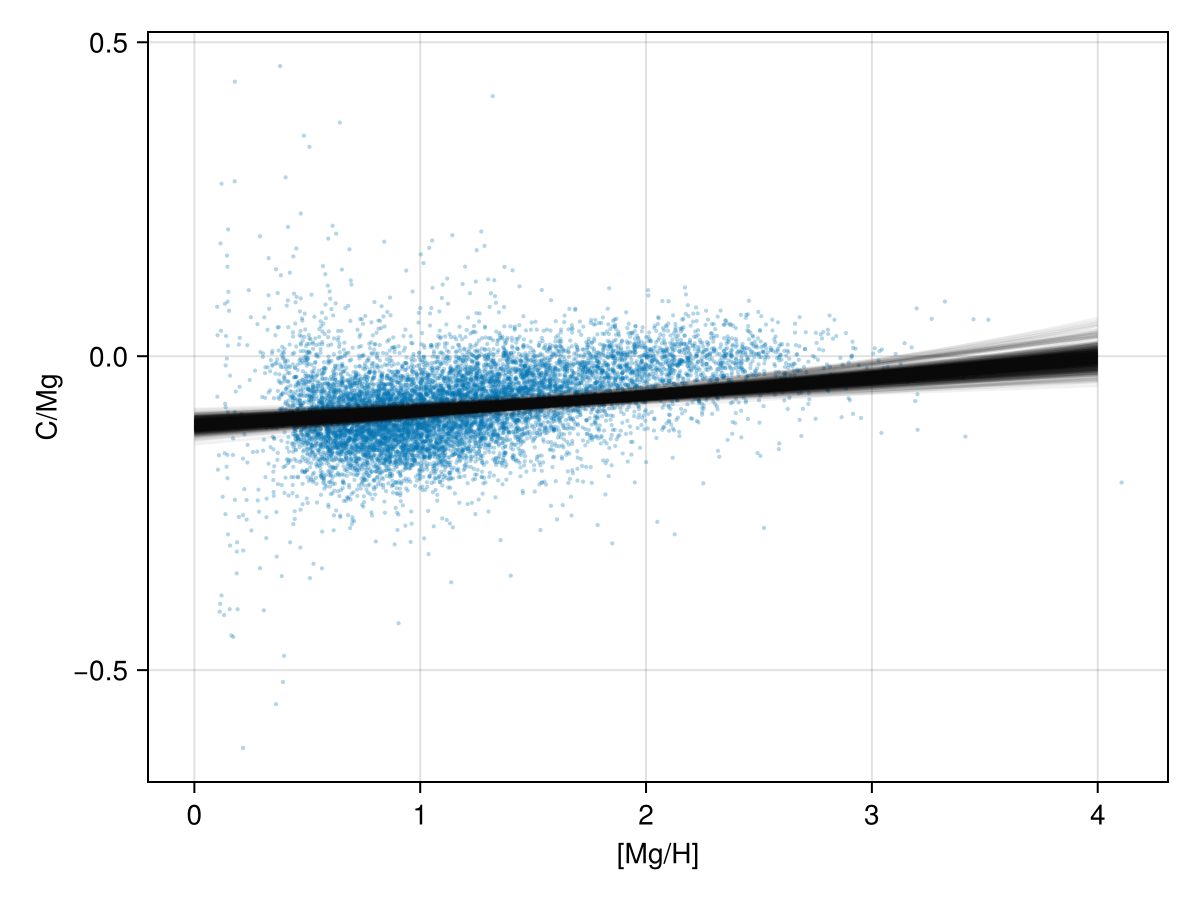

In [211]:
fig = plot_data()

plot_samples!(samples, LinRange(0, 4, 100))

fig

# Lin Lin Modelx

In [169]:

x = 10 .^ subgiants.MG_H[idx]
y = 10 .^ subgiants.C_MG[idx];
x_e = x .* log(10) .* subgiants.MG_H_ERR[idx];
y_e = y .* log(10) .* subgiants.C_MG_ERR[idx];

In [170]:
function plot_data()
    fig = Figure()
    ax = Axis(fig[1, 1], xlabel="Mg", ylabel="C/Mg")

    scatter!(x, y, markersize=3, alpha=0.3)

    fig
end

plot_data (generic function with 1 method)

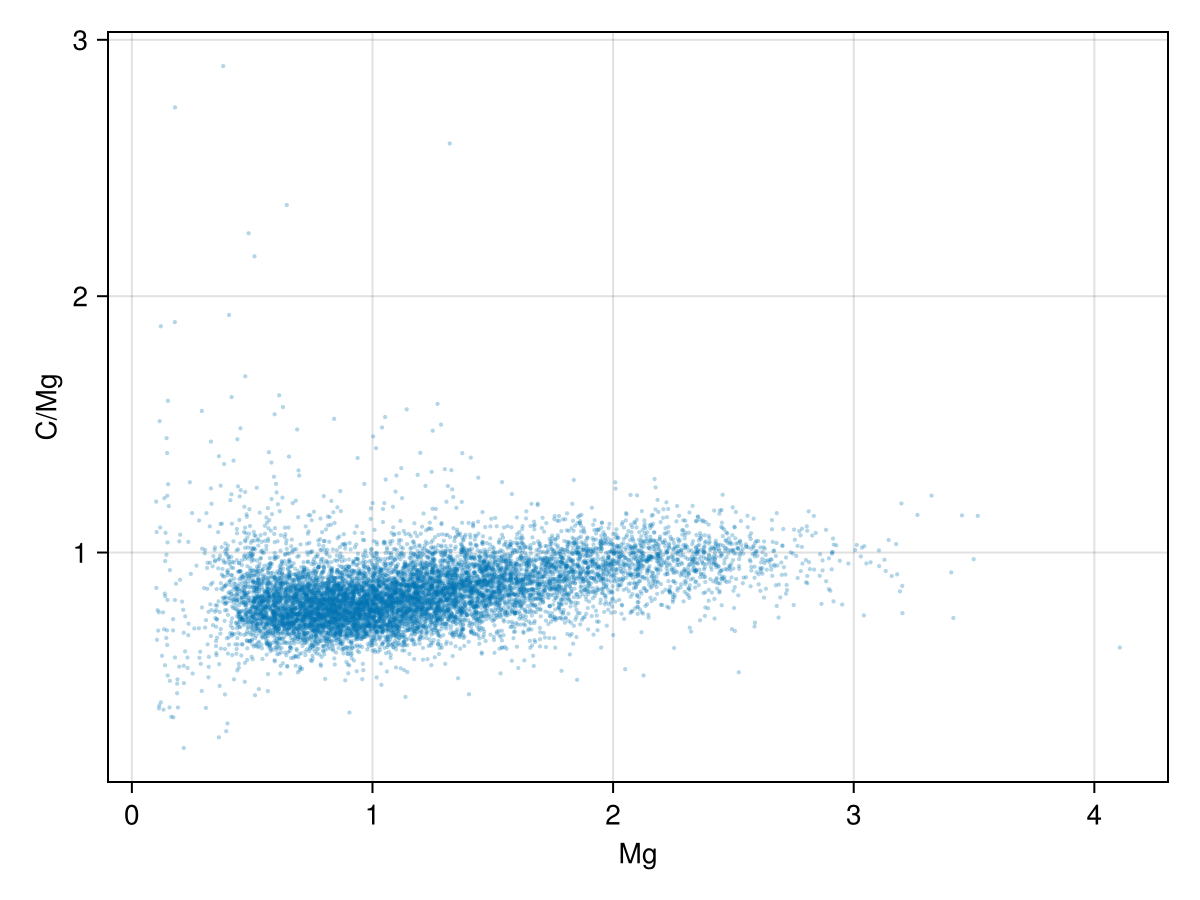

In [171]:
plot_data()

## Linear

In [113]:
@model function linear_regression(x, y, x_e, y_e)
    log_σ ~ Normal(-2, 0.8)
    a ~ Normal(0, 0.4)
    b ~ Normal(0, 0.5)

    mu = a .+ x*b

    s_int = exp(2log_σ)
    s_x = b .* x_e
    s_y = y_e

    σ = @. sqrt(s_int^2 + s_x^2 + s_y^2)
    return y ~ MvNormal(mu, σ)

end

linear_regression (generic function with 2 methods)

In [114]:
model = linear_regression(x, y, x_e, y_e)

DynamicPPL.Model{typeof(linear_regression), (:x, :y, :x_e, :y_e), (), (), NTuple{4, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(linear_regression, (x = [0.6664015675904591, 3.414090271088859, 2.000515865546813, 1.2578735932428053, 1.4750950308321973, 2.304045228219337, 0.8030451989709059, 1.4097464512054372, 0.6600943264793012, 1.183916327506944  …  0.7767709942142683, 0.6829124180777336, 1.7558645470054417, 2.0769809824302796, 1.0817328038274774, 1.3667808963927177, 0.5809971472910842, 1.1687321850684802, 0.3310464995053472, 1.5628489309077567], y = [0.6590342720669699, 0.7446462384043464, 1.072331389672758, 0.7261862140663876, 1.037131927572687, 0.8853418219667237, 0.7168330161426754, 0.8560477418696324, 0.8577781907796977, 0.8224660764103935  …  0.7507355815603309, 1.012947639433393, 0.813197434794497, 0.9991994288037135, 0.8343322000853288, 1.0334491109918165, 0.8588928650346074, 0.948475237618305, 0.7754807291863131, 0.8001637821559422], x_e = [0.05494742696272882, 0.157

In [115]:
chain = sample(model, NUTS(), 5_000)

┌ Info: Found initial step size
└   ϵ = 0.00078125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:40


Chains MCMC chain (5000×15×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 42.67 seconds
Compute duration  = 42.67 seconds
parameters        = log_σ, a, b
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

       log_σ   -1.3177    0.0066    0.0001   1996.3804   2259.7010    0.9998   ⋯
           a    0.7026    0.0025    0.0000   2758.3857   2629.9153    1.0005   ⋯
           b    0.1076    0.0018    0.0000   2829.8030   2488.0786    1.0006   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75

In [116]:
samples = DataFrame(chain);

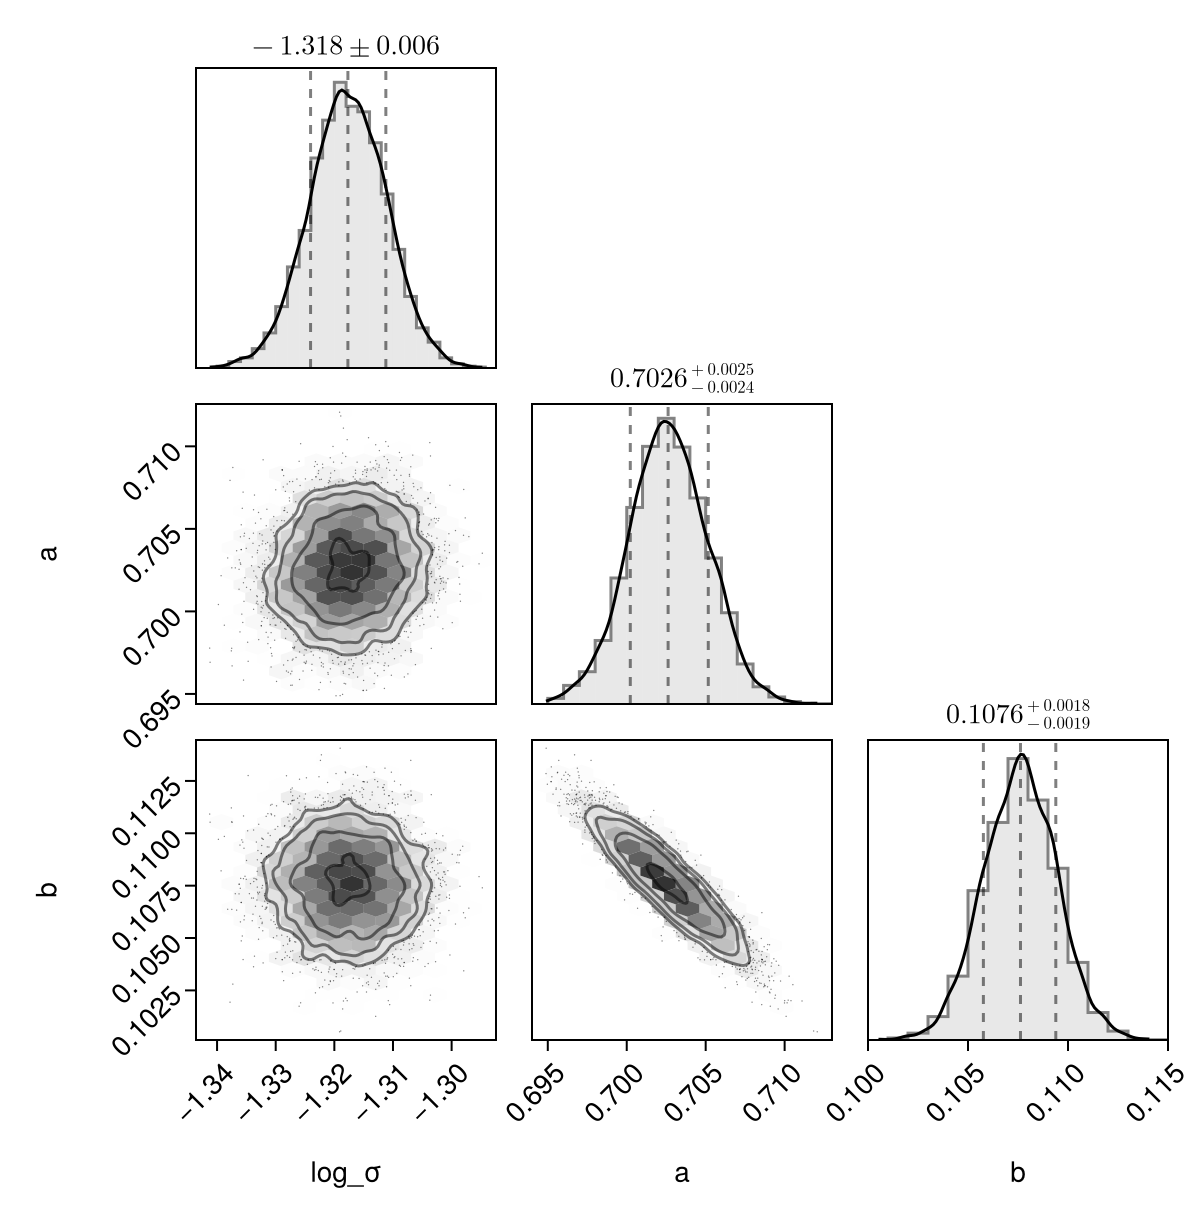

In [117]:
pairplot(chain)

In [127]:
function plot_samples!(samples, x;
        thin=10, color=:black, alpha=nothing, kwargs...)

    alpha = 1/size(samples, 1)^(1/3)

    for sample in eachrow(samples)[1:thin:end]
        y = @. sample.a + sample.b * x
        lines!(x, y, color=color, alpha=alpha)
    end
end

plot_samples! (generic function with 1 method)

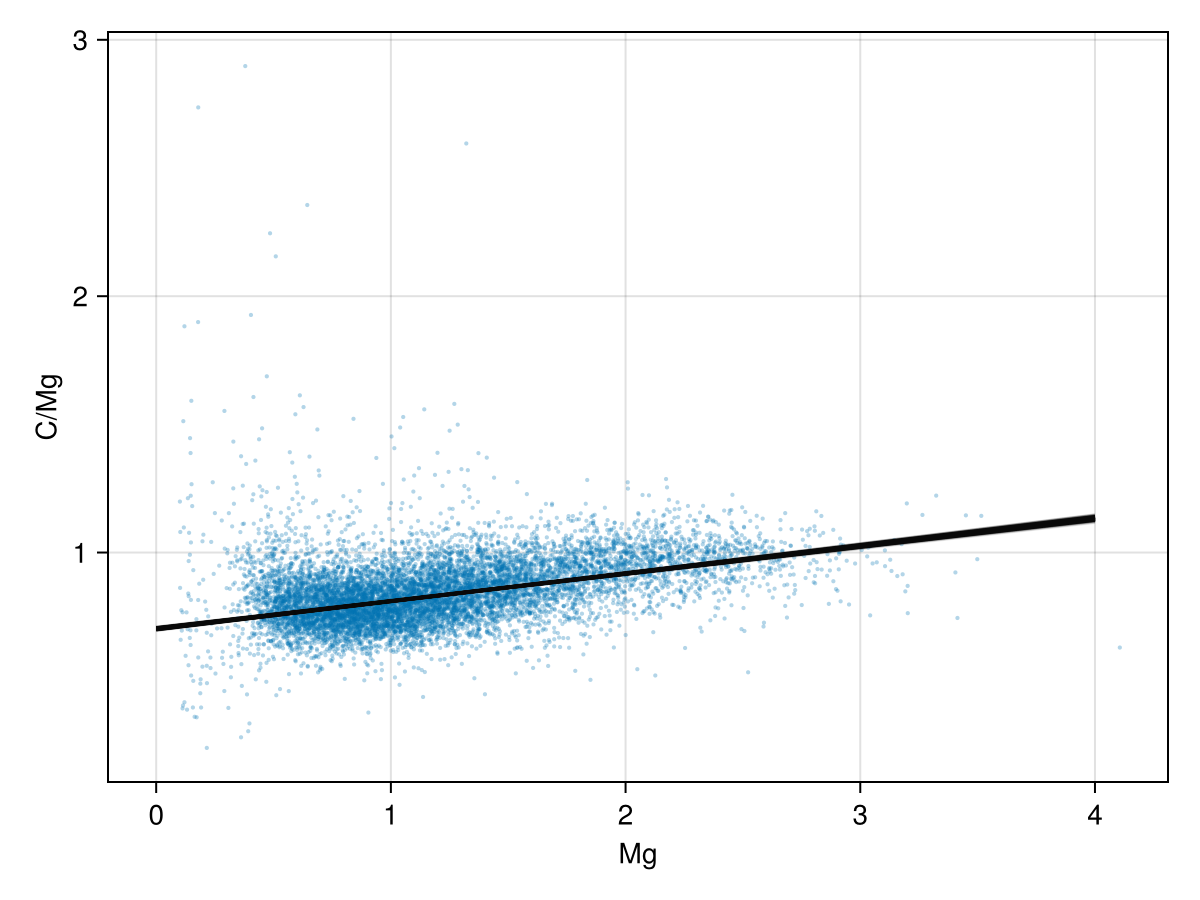

In [128]:
fig = plot_data()

plot_samples!(samples, LinRange(0, 4, 100))

fig

## Exponential

In [187]:
@model function exp_regression(x, y, x_e, y_e)
    log_σ ~ Normal(-2, 0.8)
    a ~ Normal(0, 0.4)
    b ~ Normal(0, 0.5)
    tau ~ Exponential(6)

    mu = @. a + b*exp(x/tau)
    mu_p = @. b/tau * exp(x/tau)
    
    s_int = exp(2log_σ)
    s_x = @. mu_p / mu * x_e
    s_y = y_e

    σ = @. sqrt(s_int^2 + s_x^2 + s_y^2)
    return y ~ MvNormal(mu, σ)

end

exp_regression (generic function with 2 methods)

In [188]:
model = exp_regression(x[1:100], y[1:100], x_e[1:100], y_e[1:100])

DynamicPPL.Model{typeof(exp_regression), (:x, :y, :x_e, :y_e), (), (), NTuple{4, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(exp_regression, (x = [0.6664015675904591, 3.414090271088859, 2.000515865546813, 1.2578735932428053, 1.4750950308321973, 2.304045228219337, 0.8030451989709059, 1.4097464512054372, 0.6600943264793012, 1.183916327506944  …  0.9528268658743423, 1.1584945632202976, 2.500241733200738, 0.7224802840222982, 0.6459263774143195, 0.8433483508241136, 0.49654315570305835, 0.9622856312455071, 1.5726714400298738, 0.8672414062824537], y = [0.6590342720669699, 0.7446462384043464, 1.072331389672758, 0.7261862140663876, 1.037131927572687, 0.8853418219667237, 0.7168330161426754, 0.8560477418696324, 0.8577781907796977, 0.8224660764103935  …  0.7754162641892318, 0.8239608937343101, 0.8508363189546195, 1.1020644746131611, 0.5544418194119369, 0.7753967921859061, 0.7577203828036964, 0.9463121147646706, 0.922643641284119, 0.6778865232710146], x_e = [0.05494742696272882, 0.1571322

In [189]:
chain = sample(model, NUTS(), 5_000)

┌ Info: Found initial step size
└   ϵ = 9.5367431640625e-8
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:12


Chains MCMC chain (5000×16×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 14.65 seconds
Compute duration  = 14.65 seconds
parameters        = log_σ, a, b, tau
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

       log_σ   -1.3740    0.0753    0.0017   2089.0599   1591.0027    1.0006   ⋯
           a    0.2033    0.2353    0.0067   1284.9487   1642.8620    1.0004   ⋯
           b    0.5511    0.2277    0.0065   1263.9050   1616.7520    1.0004   ⋯
         tau   10.2718    4.0677    0.1059   1408.8100   1701.5281    1.0000   ⋯
                                                       

In [190]:
samples = DataFrame(chain);

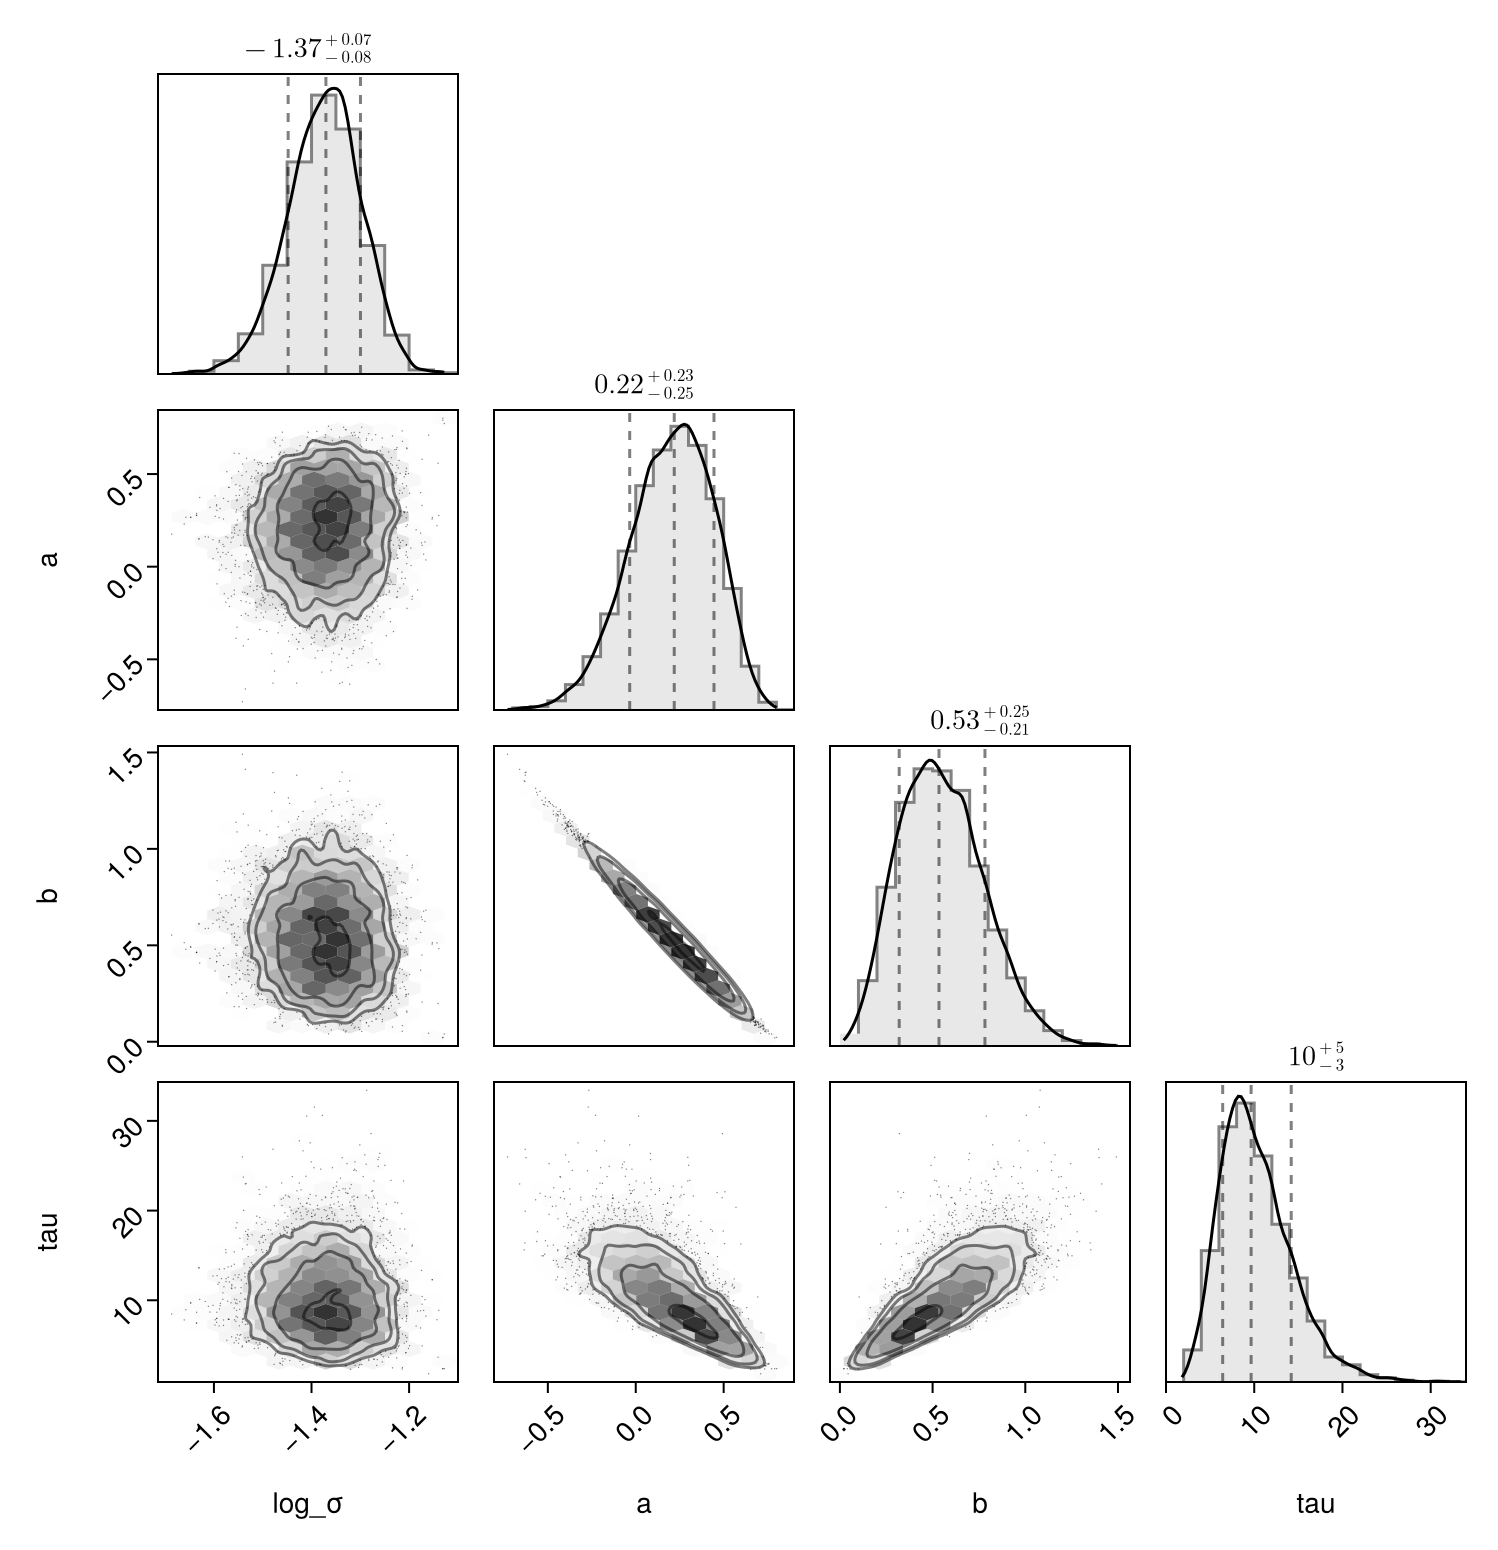

In [191]:
pairplot(chain)

In [192]:
function plot_samples!(samples, x;
        thin=10, color=:black, alpha=nothing, kwargs...)

    alpha = 1/size(samples, 1)^(1/3)

    for sample in eachrow(samples)[1:thin:end]
        y = @. sample.a + sample.b * exp(x / sample.tau)
        lines!(x, y, color=color, alpha=alpha)
    end
end

plot_samples! (generic function with 1 method)

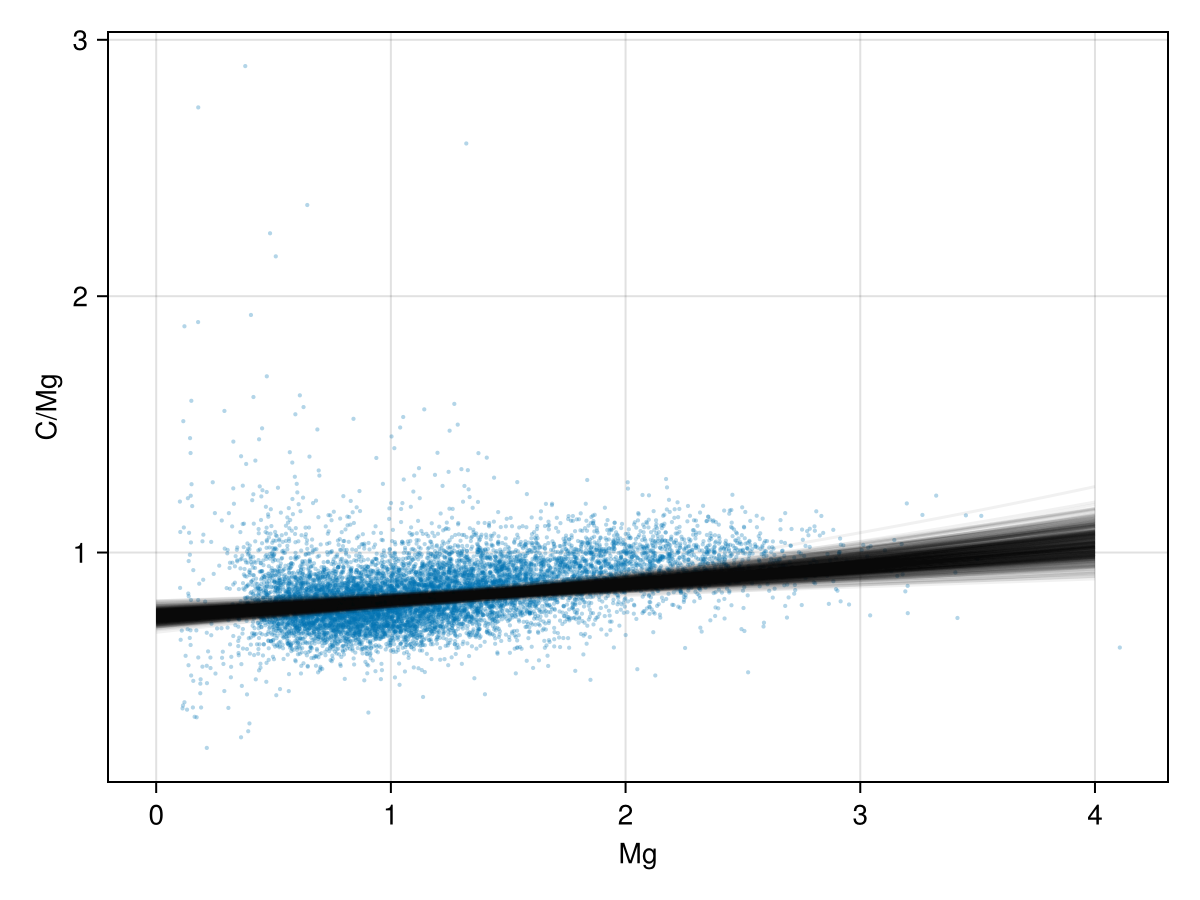

In [193]:
fig = plot_data()

plot_samples!(samples, LinRange(0, 4, 100))

fig

## Quadratic

In [178]:
@model function exp_regression(x, y, x_e, y_e)
    log_σ ~ Normal(-2, 0.8)
    a ~ Normal(0, 0.4)
    b ~ Normal(0, 0.5)
    c ~ Normal(0, 0.3)

    mu = @. a + b*x + c*x^2
    mu_p = @. b + 2*c*x
    
    s_int = exp(2log_σ)
    s_x = @. mu_p / mu * x_e
    s_y = y_e

    σ = @. sqrt(s_int^2 + s_x^2 + s_y^2)
    return y ~ MvNormal(mu, σ)

end

exp_regression (generic function with 2 methods)

In [181]:
model = exp_regression(x, y, x_e, y_e)

DynamicPPL.Model{typeof(exp_regression), (:x, :y, :x_e, :y_e), (), (), NTuple{4, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(exp_regression, (x = [0.6664015675904591, 3.414090271088859, 2.000515865546813, 1.2578735932428053, 1.4750950308321973, 2.304045228219337, 0.8030451989709059, 1.4097464512054372, 0.6600943264793012, 1.183916327506944  …  0.7767709942142683, 0.6829124180777336, 1.7558645470054417, 2.0769809824302796, 1.0817328038274774, 1.3667808963927177, 0.5809971472910842, 1.1687321850684802, 0.3310464995053472, 1.5628489309077567], y = [0.6590342720669699, 0.7446462384043464, 1.072331389672758, 0.7261862140663876, 1.037131927572687, 0.8853418219667237, 0.7168330161426754, 0.8560477418696324, 0.8577781907796977, 0.8224660764103935  …  0.7507355815603309, 1.012947639433393, 0.813197434794497, 0.9991994288037135, 0.8343322000853288, 1.0334491109918165, 0.8588928650346074, 0.948475237618305, 0.7754807291863131, 0.8001637821559422], x_e = [0.05494742696272882, 0.157132219

In [182]:
chain = sample(model, NUTS(), 5_000)

┌ Info: Found initial step size
└   ϵ = 0.000390625
Sampling: 100%|█████████████████████████████████████████| Time: 0:02:36


Chains MCMC chain (5000×16×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 156.36 seconds
Compute duration  = 156.36 seconds
parameters        = log_σ, a, b, c
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

       log_σ   -1.3183    0.0069    0.0002   1940.6423   1901.9029    0.9999   ⋯
           a    0.7198    0.0056    0.0002   1385.4929   1711.8417    1.0001   ⋯
           b    0.0797    0.0083    0.0002   1379.4670   1629.1695    1.0001   ⋯
           c    0.0096    0.0028    0.0001   1462.1061   1973.4882    1.0000   ⋯
                                                       

In [183]:
samples = DataFrame(chain);

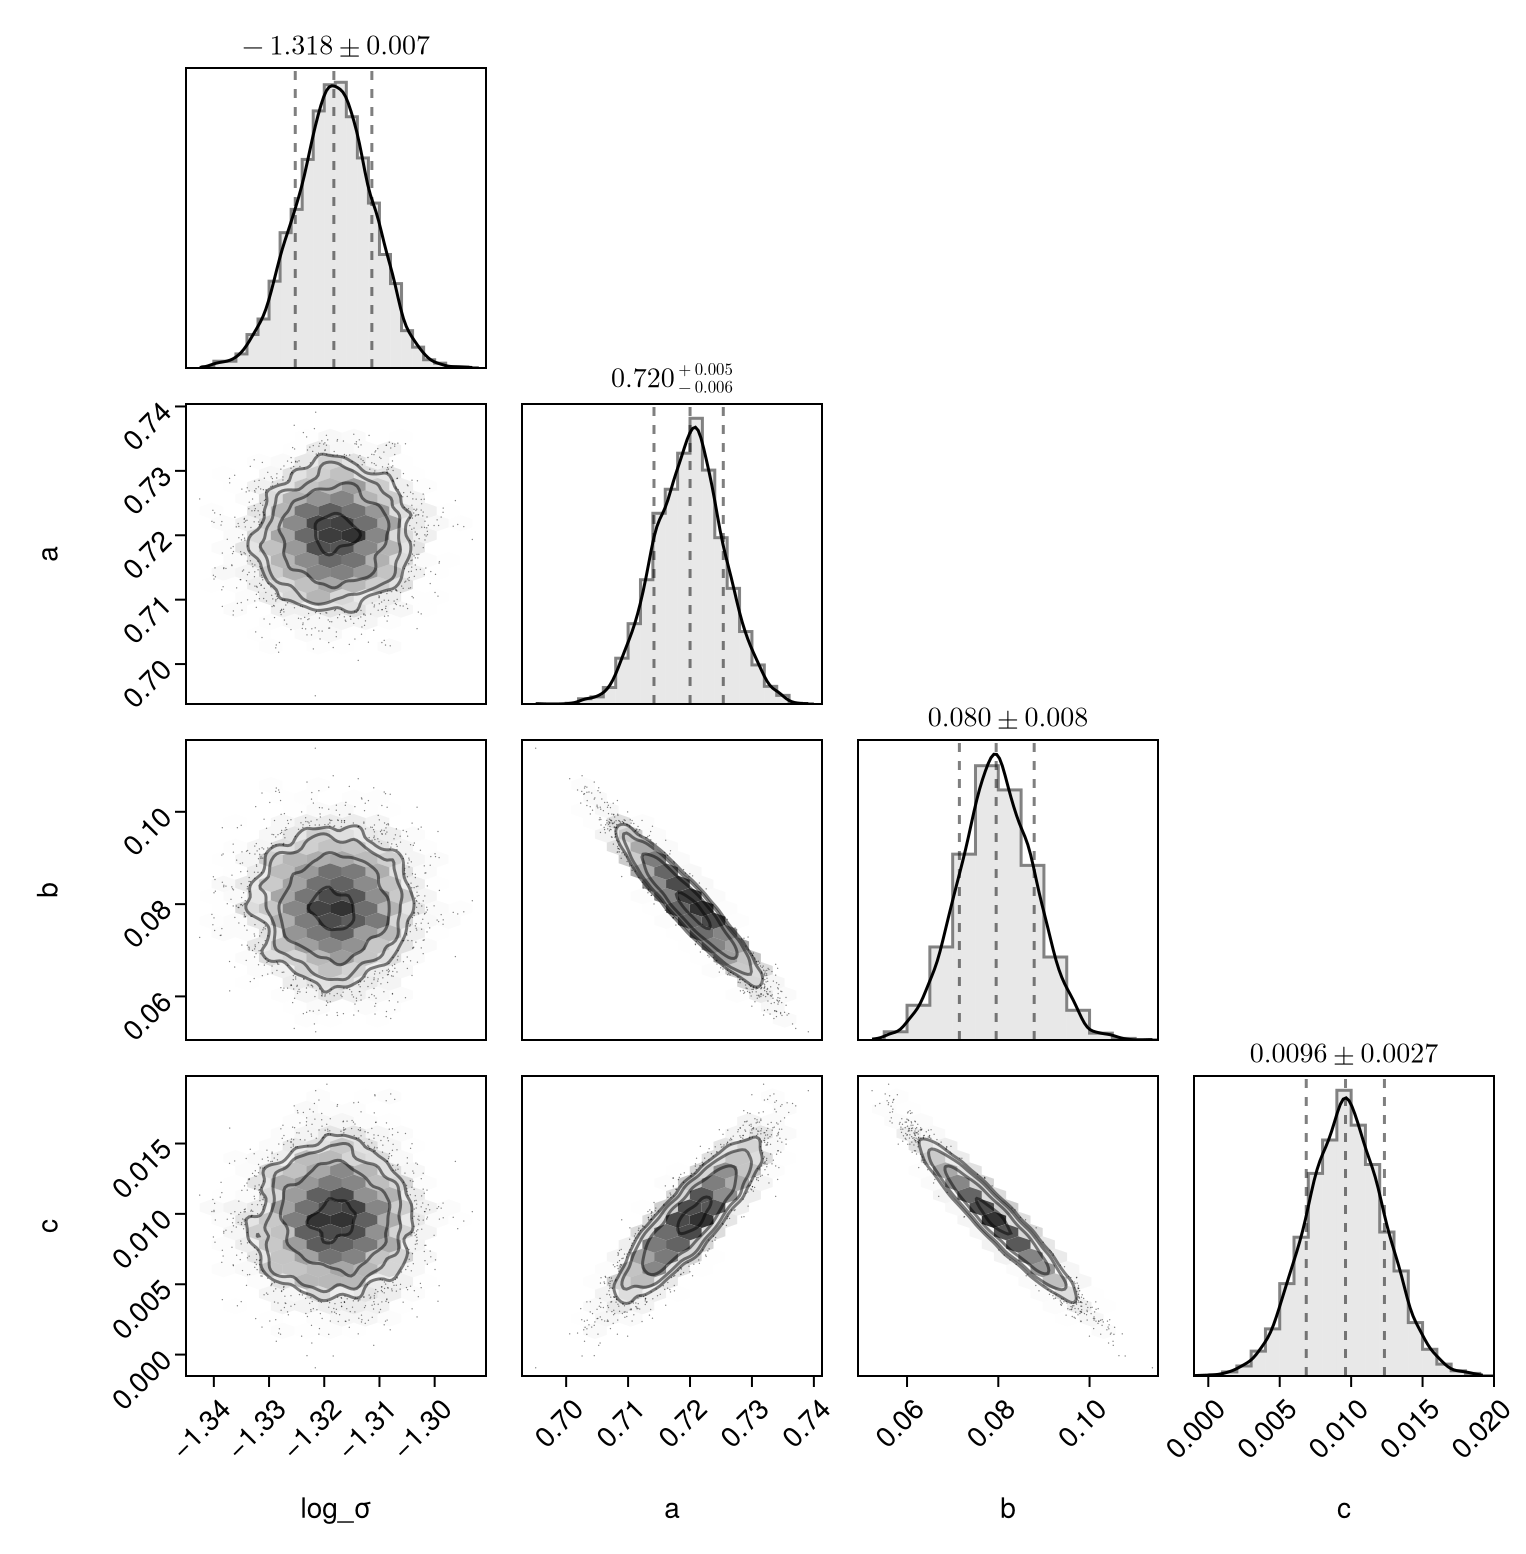

In [184]:
pairplot(chain)

In [185]:
function plot_samples!(samples, x;
        thin=10, color=:black, alpha=nothing, kwargs...)

    alpha = 1/size(samples, 1)^(1/3)

    for sample in eachrow(samples)[1:thin:end]
        y = @. sample.a + sample.b *x + sample.c * x^2
        lines!(x, y, color=color, alpha=alpha)
    end
end

plot_samples! (generic function with 1 method)

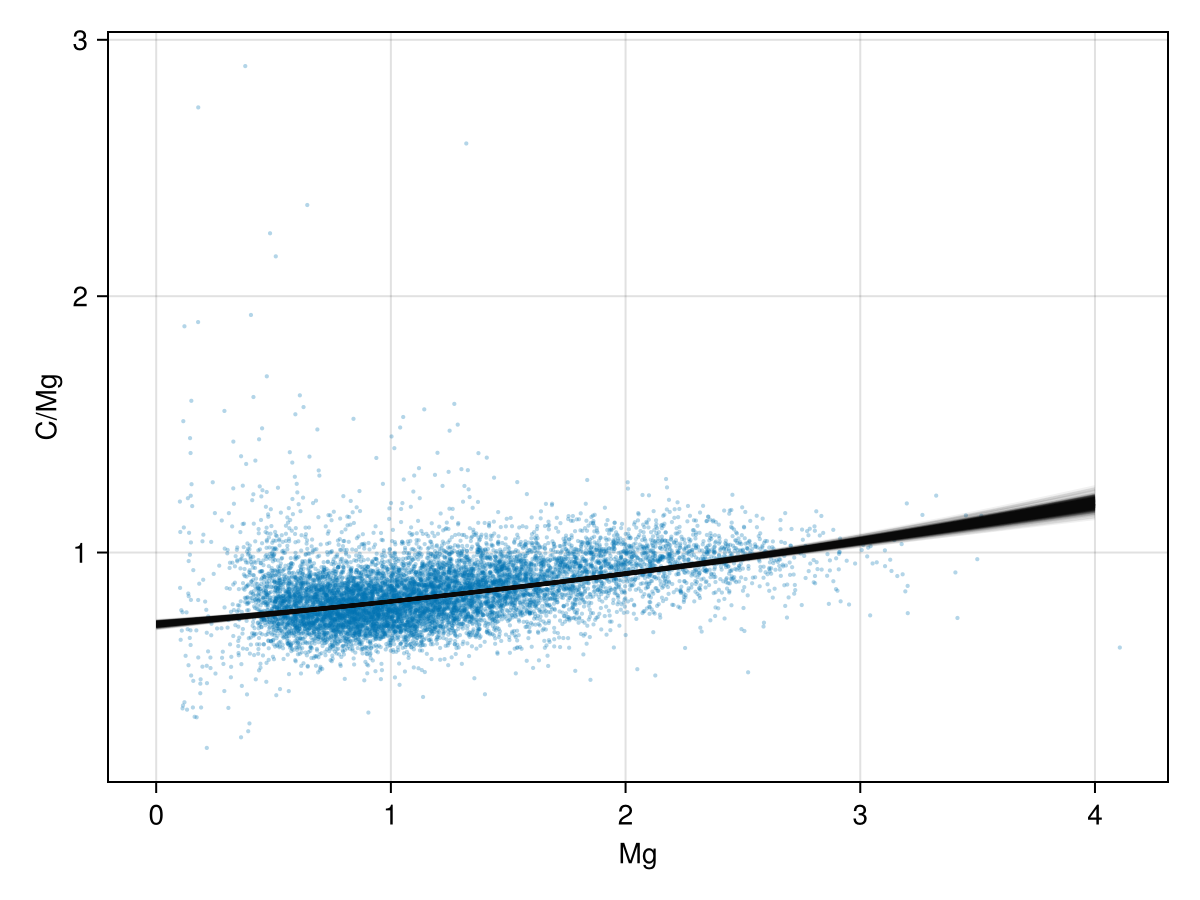

In [186]:
fig = plot_data()

plot_samples!(samples, LinRange(0, 4, 100))

fig